# Parameterization of the pressure smoothing 

We can approximate the effect of pressure smoothing as a Gaussian with rms $\lambda_F$, or wavenumber $k_F = 2\pi/\lambda_F$.

We need to marginalize over $k_F(z)$, and we will parameterize it as a polynomial in logarithmic space.

$$ k_F(z) = \sum_{n=0}^{N_T-1} \phi^F_n \, \left( \frac{1+z}{1+z_F} \right)^n $$

Given what we know about He_II reionization, it is probably good to use $z_F = 3.5$.

We hope that 3-4 parameters should be enough to describe the pressure smoothing.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import pressure_model
import camb_cosmo

In [2]:
# construct fiducial model
kF_model_fid=pressure_model.PressureModel()

### Plot models in velocity units

Text(0.5, 1.0, 'Filtering length')

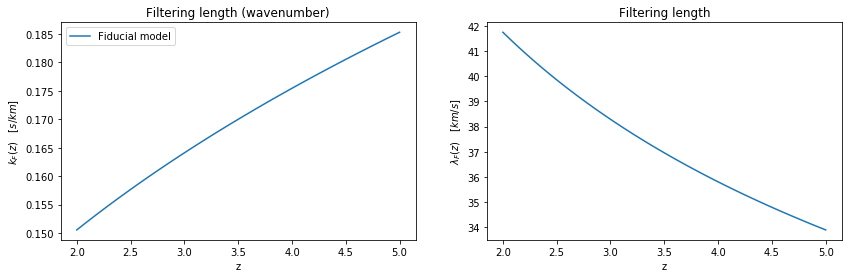

In [3]:
# plot k_F and lambda_F 
plt.figure(figsize=[14,4])
z=np.linspace(2.0,5.0,100)
# start with k_F
plt.subplot(1, 2, 1)
plt.plot(z,kF_model_fid.get_kF_kms(z),label='Fiducial model')
plt.xlabel('z')
plt.ylabel(r'$k_F(z) \quad [s/km]$')
plt.title('Filtering length (wavenumber)')
plt.legend()
# now effective optical depth
plt.subplot(1, 2, 2)
plt.plot(z,2*np.pi/kF_model_fid.get_kF_kms(z),label='Fiducial model')
plt.xlabel('z')
plt.ylabel(r'$\lambda_F(z) \quad [km/s]$')
plt.title('Filtering length')
#plt.legend()

### Fit (by eye) pressure history in Planck massless simulation 

In [4]:
kF_Mpc_sim=[10.51415281,9.52189431,8.70359058,7.99846776,7.4656959,7.05118807,
            6.74674899,6.56182781,6.44557735,6.36095208,6.3033428,6.2527066,6.21003473]
z_sim=np.linspace(5.0,2.0,13)

In [7]:
# tuned model to fit simulation output
#kF_model=pressure_model.PressureModel(z_kF=3.0,ln_kF_coeff=[1.5,0.2,np.log(0.08)])
kF_model=pressure_model.PressureModel(z_kF=3.0,ln_kF_coeff=[np.log(0.09)])

Text(0.5, 1.0, 'Filtering length')

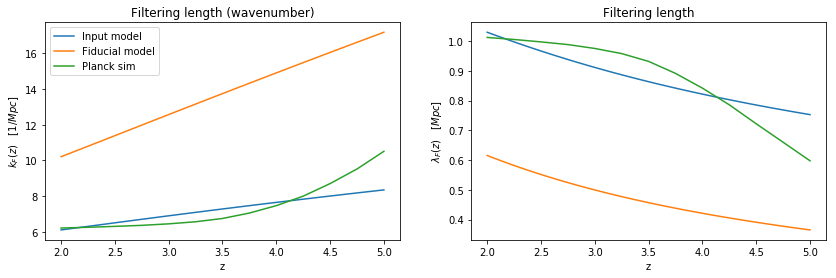

In [8]:
# plot k_F and lambda_F in both models, in comoving units (fiducial cosmology)
cosmo_fid=camb_cosmo.get_cosmology()
z=np.linspace(2.0,5.0,100)
dkms_dhMpc=camb_cosmo.dkms_dhMpc(cosmo_fid,z)
h=cosmo_fid.H0/100.0
plt.figure(figsize=[14,4])
# start with k_F
plt.subplot(1, 2, 1)
plt.plot(z,kF_model.get_kF_kms(z)*dkms_dhMpc*h,label='Input model')
plt.plot(z,kF_model_fid.get_kF_kms(z)*dkms_dhMpc*h,label='Fiducial model')
plt.plot(z_sim,kF_Mpc_sim,label='Planck sim')
plt.xlabel('z')
plt.ylabel(r'$k_F(z) \quad [1/Mpc]$')
plt.title('Filtering length (wavenumber)')
plt.legend()
# now effective optical depth
plt.subplot(1, 2, 2)
plt.plot(z,2*np.pi/kF_model.get_kF_kms(z)/dkms_dhMpc/h,label='Input model')
plt.plot(z,2*np.pi/kF_model_fid.get_kF_kms(z)/dkms_dhMpc/h,label='Fiducial model')
plt.plot(z_sim,2.0*np.pi/np.array(kF_Mpc_sim),label='Planck sim')
plt.xlabel('z')
plt.ylabel(r'$\lambda_F(z) \quad [Mpc]$')
plt.title('Filtering length')
#plt.legend()